In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path_dre = '/content/drive/MyDrive/Junior/Winter/CS129 Final Project/CS129Diabetes_HealthIndicators.csv'
dataset_path_naama = '/content/drive/MyDrive/3rd year/CS 129/CS129 Final Project/CS129Diabetes_HealthIndicators.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv(dataset_path_naama)

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from tensorflow.keras import backend as K
from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

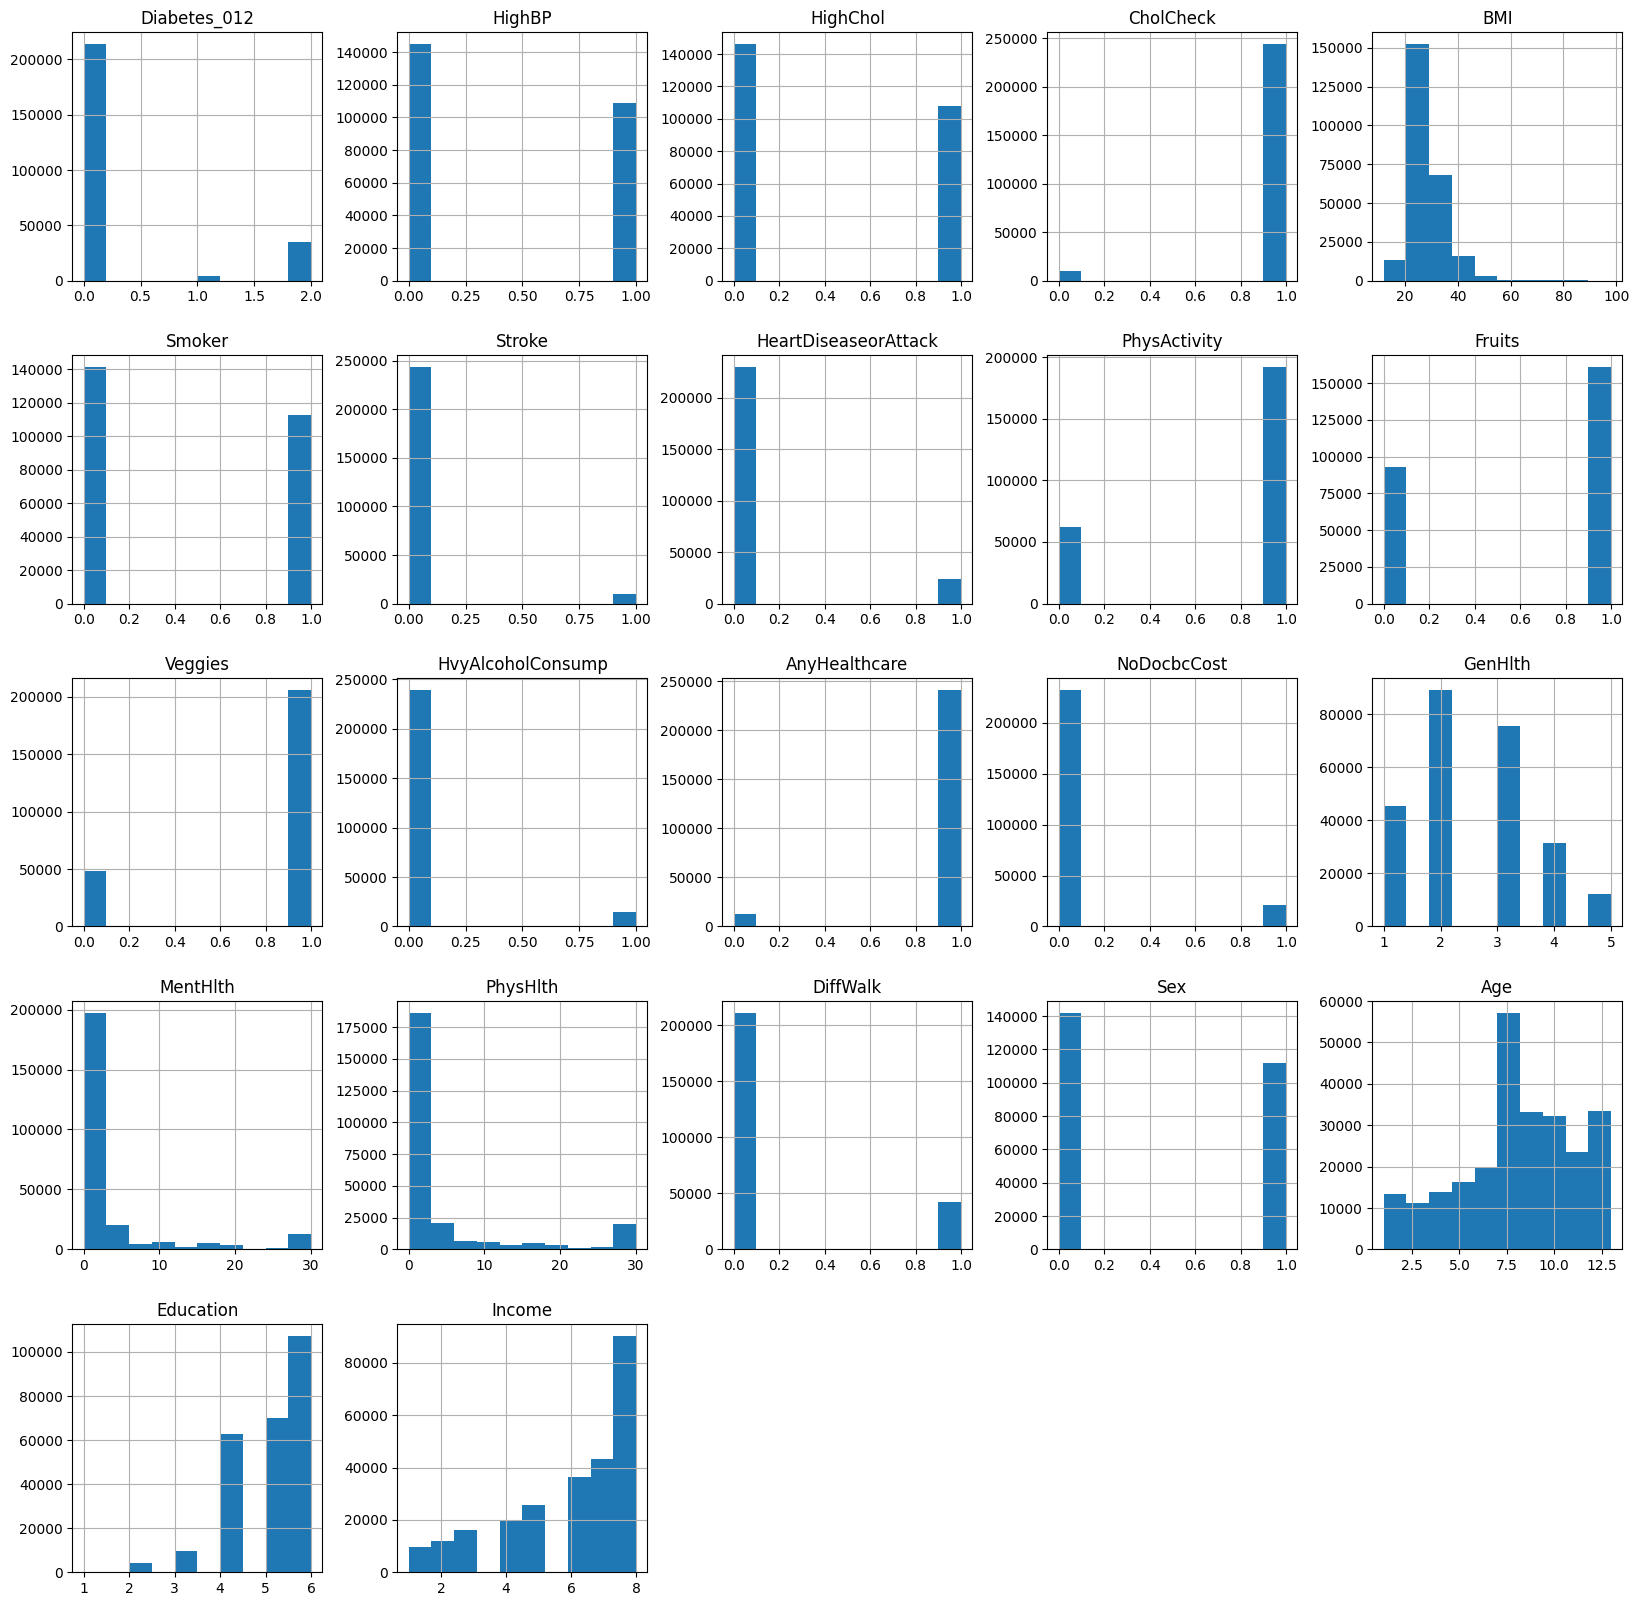

In [ ]:
df.hist(figsize = (20,20))
plt.show()

In [ ]:
# PREPROCESSING
# Populate target variable
y = np.array(df.pop("Diabetes_012"))
# Combine y-values of 1 and 2 into one class
y[y != 0] = 1

# feature matrix
X = np.array(df)
# standardize features in X matrix
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)


In [ ]:
# first ten values of y
print(y[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# a feature vector in X
print(X[0])

[ 1.15368814  1.16525449  0.19692156  1.75793567  1.12092719 -0.20563655
 -0.3224576  -1.76281393 -1.31687168  0.48208665 -0.24401415  0.22686264
 -0.30317313  2.32912057  1.99859213  1.23399871  2.22361507 -0.88702088
  0.31690008 -1.06559465 -1.4744874 ]


In [ ]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (253680, 21)
The shape of y is: (253680,)


In [ ]:
# create neural network model
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(21,)),
        Dense(150, activation='relu', name = "L1"),
        Dense(150, activation='relu',  name = "L2"),
        Dense(1, activation='sigmoid', name = "Output_Layer"),
    ], name = "my_model"
)

In [ ]:
# split data into train and test & stratify for even distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

In [ ]:
# train model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# fit model to the data, mini-batch gradient descent, include validation split for data
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=150,
    verbose=1
)


Epoch 1/40
1218/1218 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8492 - auc: 0.8161 - val_loss: 0.3421 - val_accuracy: 0.8495 - val_auc: 0.8202
Epoch 2/40
1218/1218 [==============================] - 5s 4ms/step - loss: 0.3386 - accuracy: 0.8513 - auc: 0.8242 - val_loss: 0.3408 - val_accuracy: 0.8504 - val_auc: 0.8214
Epoch 3/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.3376 - accuracy: 0.8517 - auc: 0.8257 - val_loss: 0.3403 - val_accuracy: 0.8513 - val_auc: 0.8225
Epoch 4/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.3368 - accuracy: 0.8520 - auc: 0.8266 - val_loss: 0.3408 - val_accuracy: 0.8507 - val_auc: 0.8219
Epoch 5/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.3361 - accuracy: 0.8526 - auc: 0.8276 - val_loss: 0.3413 - val_accuracy: 0.8500 - val_auc: 0.8212
Epoch 6/40
1218/1218 [==============================] - 4s 4ms/step - loss: 0.3352 - accuracy: 0.8532 - auc: 0.8286 - va

Test Loss: 0.3869533836841583
Test Accuracy: 0.8359153270721436
Test AUC: 0.788974404335022
1586/1586 [==============================] - 2s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      1.00      0.91     42741
     Class 1       0.00      0.00      0.00      7995

    accuracy                           0.84     50736
   macro avg       0.42      0.50      0.46     50736
weighted avg       0.71      0.84      0.77     50736



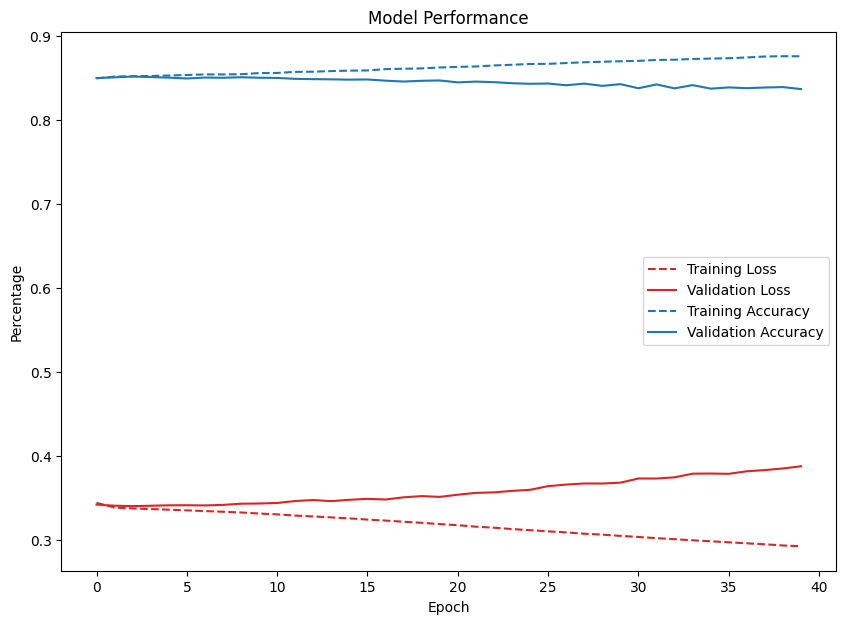

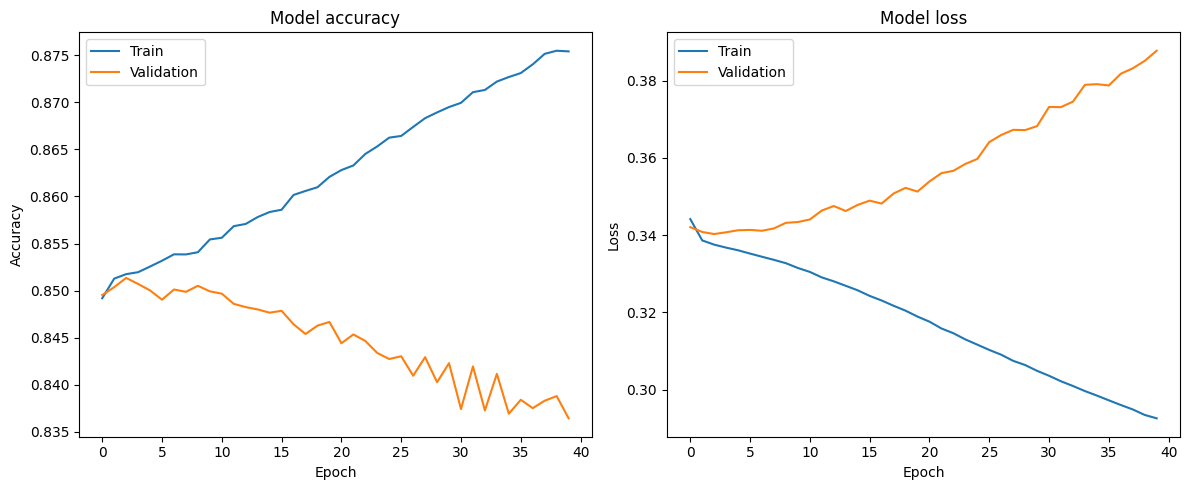

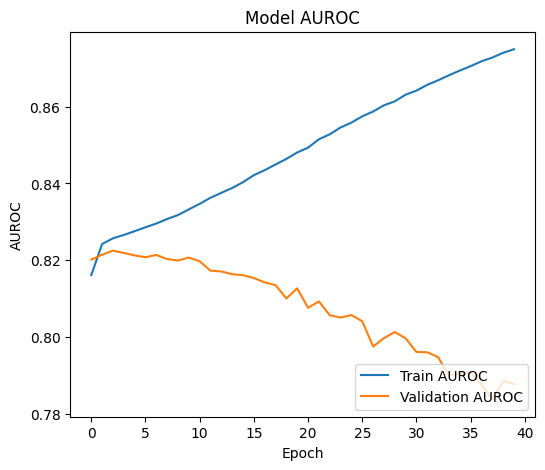

In [ ]:
# Evaluate model on test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

# Display test loss and accuracy
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test AUC: {test_auc}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

test_precision = precision_score(y_test, y_pred_classes, average='binary', zero_division=1)
test_recall = recall_score(y_test, y_pred_classes, average='binary', zero_division=1)
test_f1 = f1_score(y_test, y_pred_classes, average='binary', zero_division=1)

# Classification report for each class
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))


# Convert accuracy to percentage
accuracy_percentage = [x for x in history.history['accuracy']]
val_accuracy_percentage = [x  for x in history.history['val_accuracy']]
test_accuracy_percentage = test_accuracy

# Plot
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', color='tab:red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='tab:red')
plt.plot(accuracy_percentage, label='Training Accuracy', linestyle='--', color='tab:blue')
plt.plot(val_accuracy_percentage, label='Validation Accuracy', color='tab:blue')


# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.title('Model Performance')
plt.legend(loc='best')
plt.show()



# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot training & validation AUROC
plt.figure(figsize=(6, 5))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUROC')
plt.ylabel('AUROC')
plt.xlabel('Epoch')
plt.legend(['Train AUROC', 'Validation AUROC'], loc='lower right')
plt.show()


In [ ]:
# neural network with L1 regularization -- ultimately did not use, decreased performance
from tensorflow.keras.regularizers import l1

# neural network model with L1 regularization
model2 = Sequential([
    tf.keras.Input(shape=(21,)),
    Dense(150, activation='relu', name="L1", kernel_regularizer=l1(0.01)),
    Dense(150, activation='relu', name="L2", kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid', name="Output_Layer"),
], name="my_model2")

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# fit model to data with validation split
history = model2.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=40,
    batch_size=150,
    verbose=1
)

Epoch 1/40
1218/1218 [==============================] - 6s 4ms/step - loss: 1.2577 - accuracy: 0.8419 - auc: 0.5207 - val_loss: 0.4666 - val_accuracy: 0.8422 - val_auc: 0.5000
Epoch 2/40
1218/1218 [==============================] - 5s 4ms/step - loss: 0.4663 - accuracy: 0.8424 - auc: 0.4994 - val_loss: 0.4662 - val_accuracy: 0.8422 - val_auc: 0.5000
Epoch 3/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.4662 - accuracy: 0.8424 - auc: 0.5004 - val_loss: 0.4671 - val_accuracy: 0.8422 - val_auc: 0.5000
Epoch 4/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.4662 - accuracy: 0.8424 - auc: 0.4994 - val_loss: 0.4664 - val_accuracy: 0.8422 - val_auc: 0.5000
Epoch 5/40
1218/1218 [==============================] - 5s 4ms/step - loss: 0.4664 - accuracy: 0.8424 - auc: 0.5004 - val_loss: 0.4667 - val_accuracy: 0.8422 - val_auc: 0.5000
Epoch 6/40
1218/1218 [==============================] - 4s 3ms/step - loss: 0.4663 - accuracy: 0.8424 - auc: 0.4972 - va

In [ ]:
# K-fold Cross Validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1234)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, validate in kfold.split(X_train, y_train):
    model = Sequential([
        tf.keras.Input(shape=(21,)),
        Dense(150, activation='relu', name=f"L1_fold{fold_no}"),
        Dense(150, activation='relu', name=f"L2_fold{fold_no}"),
        Dense(1, activation='sigmoid', name=f"Output_Layer_fold{fold_no}"),
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # in progress print statement
    print(f'Training for fold {fold_no} ...')

    # Fit model to data
    history = model.fit(X_train[train], y_train[train],
                        batch_size=150,
                        epochs=40,
                        verbose=1,
                        validation_data=(X_train[validate], y_train[validate]))

    # performance metrics
    scores = model.evaluate(X_train[validate], y_train[validate], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

#  average scores
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')


Training for fold 1 ...
Epoch 1/40
1083/1083 [==============================] - 8s 6ms/step - loss: 0.3440 - accuracy: 0.8498 - auc: 0.8170 - val_loss: 0.3376 - val_accuracy: 0.8509 - val_auc: 0.8244
Epoch 2/40
1083/1083 [==============================] - 7s 7ms/step - loss: 0.3397 - accuracy: 0.8509 - auc: 0.8231 - val_loss: 0.3369 - val_accuracy: 0.8519 - val_auc: 0.8253
Epoch 3/40
1083/1083 [==============================] - 7s 7ms/step - loss: 0.3386 - accuracy: 0.8512 - auc: 0.8247 - val_loss: 0.3366 - val_accuracy: 0.8523 - val_auc: 0.8255
Epoch 4/40
1083/1083 [==============================] - 8s 8ms/step - loss: 0.3377 - accuracy: 0.8518 - auc: 0.8258 - val_loss: 0.3385 - val_accuracy: 0.8515 - val_auc: 0.8234
Epoch 5/40
1083/1083 [==============================] - 8s 8ms/step - loss: 0.3372 - accuracy: 0.8518 - auc: 0.8265 - val_loss: 0.3385 - val_accuracy: 0.8526 - val_auc: 0.8248
Epoch 6/40
1083/1083 [==============================] - 8s 8ms/step - loss: 0.3362 - accuracy: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1586/1586 - 3s - loss: 0.3948 - accuracy: 0.8485 - 3s/epoch - 2ms/step

Test Loss: 0.39475008845329285, Test Accuracy: 0.8484902381896973


In [ ]:
# Predict classes on test set
y_pred = model.predict(X_test)
# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
test_precision = precision_score(y_test, y_pred_classes, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_pred_classes, average='macro', zero_division=0)
test_f1 = f1_score(y_test, y_pred_classes, average='macro', zero_division=0)

# Print metrics
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

1586/1586 [==============================] - 2s 1ms/step
Test Precision: 0.4676244638918053
Test Recall: 0.39394192962161984
Test F1 Score: 0.40582809013220394


In [ ]:
# find optimal learning rate -- done on original multi class neural network not used in final binary neural network

#  potential learning rates to try
learning_rates = [1e-3, 1e-4, 1e-5]

f1_scores = []

for lr in learning_rates:

    # Compile model with current learning rate
    my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=Adam(learning_rate=lr),
                  metrics=['accuracy'])


    # Train model
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Predict classes on test set
    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate metrics
    test_f1 = f1_score(y_test, y_pred_classes, average='macro', zero_division=0)
    f1_scores.append(test_f1)

    # F1 score for current learning rate
    print(f'Learning Rate: {lr} | Test F1 Score: {test_f1}')

# Find best learning rate
best_lr_index = np.argmax(f1_scores)
best_lr = learning_rates[best_lr_index]
best_f1_score = f1_scores[best_lr_index]

print(f'\nBest Learning Rate: {best_lr} with F1 Score: {best_f1_score}')

Learning Rate: 0.001 | Test F1 Score: 0.3843658650259365
Learning Rate: 0.0001 | Test F1 Score: 0.3838079305739937
Learning Rate: 1e-05 | Test F1 Score: 0.36600111563093574

Best Learning Rate: 0.001 with F1 Score: 0.3843658650259365


Model with 1 layers: F1 Score = 0.38452560860124985
Model with 2 layers: F1 Score = 0.37906215972608753
Model with 3 layers: F1 Score = 0.3861726663041405
Model with 4 layers: F1 Score = 0.38017512791832636
Model with 5 layers: F1 Score = 0.37692503641910974


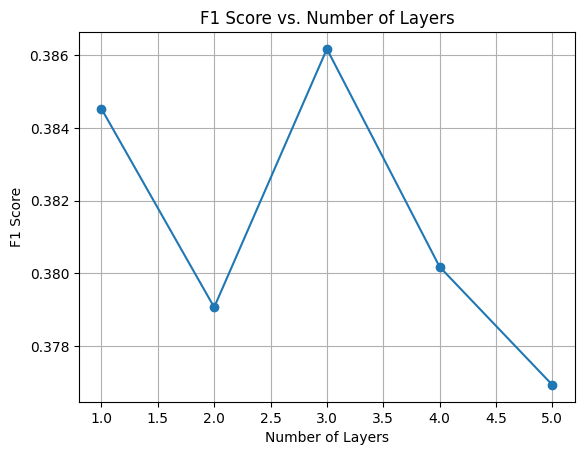

The optimal number of layers is 3 with an F1 Score of 0.3861726663041405


In [ ]:
# find optimal number of layers -- done on original multi class neural network not used in final binary neural network
f1_scores = []


for num_layers in range(1, 6):

    model = Sequential()
    model.add(Input(shape=(21,)))
    for _ in range(num_layers):
        model.add(Dense(25, activation='relu'))
    model.add(Dense(3, activation='softmax', name="Output_Layer"))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # train model
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # predict classes
    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # calc F1 score
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    f1_scores.append(f1)
    print(f"Model with {num_layers} layers: F1 Score = {f1}")

# plot F1 scores
plt.plot(range(1, 6), f1_scores, marker='o')
plt.title('F1 Score vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# return optimal w/ F1 score
optimal_num_layers = np.argmax(f1_scores) + 1
print(f"The optimal number of layers is {optimal_num_layers} with an F1 Score of {max(f1_scores)}")

Config: (10, 20, 30), F1 Score: 0.3884361921336082
Config: (25, 25, 25), F1 Score: 0.38378108867392063
Config: (20, 25, 30), F1 Score: 0.3795260058999883
Config: (20, 30, 40), F1 Score: 0.385400125572944
Config: (15, 30, 45), F1 Score: 0.3817955504948707
Config: (45, 30, 15), F1 Score: 0.3853385442381008
Config: (25, 50, 25), F1 Score: 0.37837396693695474
Config: (35, 35, 35), F1 Score: 0.385215294868311


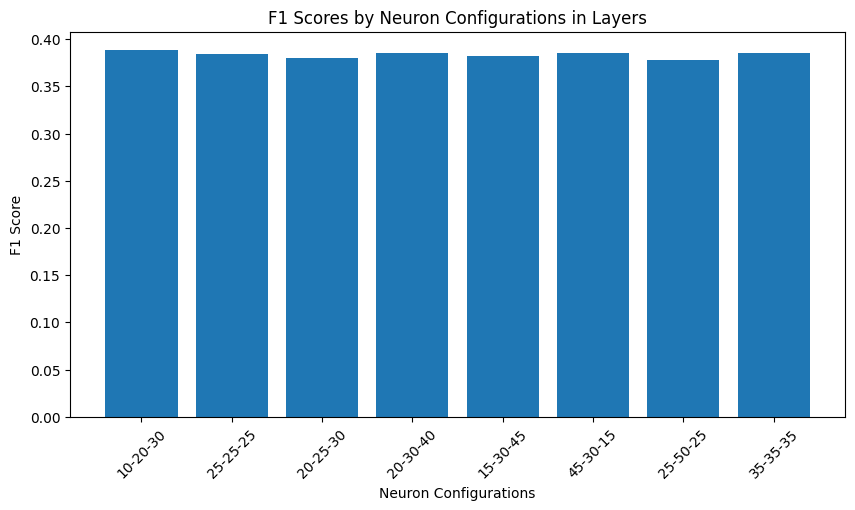

The optimal configuration of neurons is: (10, 20, 30) with F1 Score: 0.3884361921336082


In [ ]:
# find optimal number of weights per layer -- done on original multi class neural network not used in final binary neural network
neuron_configs = [
    (10, 20, 30),
    (25, 25, 25),
    (20, 25, 30),
    (20, 30, 40),
    (15, 30, 45),
    (45, 30, 15),
    (25, 50, 25),
    (35, 35, 35),
]

f1_scores = []
config_labels = []

for config in neuron_configs:
    tf.random.set_seed(1234)
    model = Sequential([
        Input(shape=(21,)),
        Dense(config[0], activation='relu'),
        Dense(config[1], activation='relu'),
        Dense(config[2], activation='relu'),
        Dense(3, activation='softmax', name="Output_Layer"),
    ])

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, verbose=0)

    y_pred = model.predict(X_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    f1 = f1_score(y_test, y_pred_classes, average='macro', zero_division=0)
    f1_scores.append(f1)
    config_labels.append(f"{config[0]}-{config[1]}-{config[2]}")
    print(f"Config: {config}, F1 Score: {f1}")

# return optimal weights
optimal_config_index = np.argmax(f1_scores)
optimal_config = neuron_configs[optimal_config_index]
print(f"The optimal configuration of neurons is: {optimal_config} with F1 Score: {f1_scores[optimal_config_index]}")


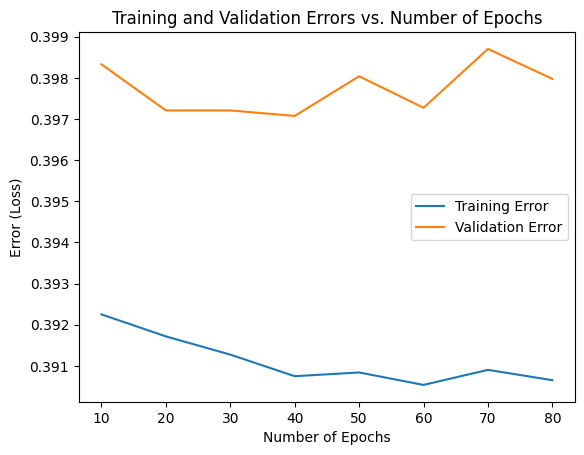

The optimal number of epochs is: 40


In [ ]:
# find optimal amount of epochs - done on original multi class neural network not used in final binary neural network
# Range of epochs to test
epoch_values = [10, 20, 30, 40, 50, 60, 70, 80]

training_errors = []
validation_errors = []

for epochs in epoch_values:
    tf.random.set_seed(1234)
    model = Sequential([
        Input(shape=(21,)),
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(30, activation='relu'),
        Dense(3, activation='softmax', name="Output_Layer"),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)

    #  training and validation errors for current number of epochs
    training_error = history.history['loss'][-1]
    validation_error = history.history['val_loss'][-1]

    training_errors.append(training_error)
    validation_errors.append(validation_error)

# Plot training and validation errors
plt.plot(epoch_values, training_errors, label='Training Error')
plt.plot(epoch_values, validation_errors, label='Validation Error')
plt.xlabel('Number of Epochs')
plt.ylabel('Error (Loss)')
plt.title('Training and Validation Errors vs. Number of Epochs')
plt.legend()
plt.show()

# return optimal number of epochs
optimal_epochs_index = np.argmin(validation_errors)
optimal_epochs = epoch_values[optimal_epochs_index]
print(f"The optimal number of epochs is: {optimal_epochs}")
